In [19]:
from matplotlib import pyplot as plt
import fastf1

import fastf1.plotting

fastf1.plotting.setup_mpl()

race = fastf1.get_session(2023, 'Silverstone', 'R')
race.load()


core           INFO 	Loading data for British Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


In [20]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)

In [21]:
class BrakingDrs:

    def __init__(self, r):
        self.race = r
        # self.drivers = drivers   
        
    
    def _filter_driver_data(self, driver):
        """sort for relevant lapst in race, no SC, no box, dif tyers
        
        return dict Tyer: (start_lap, end_lap)
        """
        driver_df = race.laps.pick_driver(driver).copy()
        driver_df['LapEndDate'] = driver_df['LapStartDate']
        driver_df['LapEndDate'] = driver_df['LapEndDate'].shift(-1)
        driver_df = driver_df[driver_df['PitOutTime'].isnull() & driver_df['PitInTime'].isnull()]
        driver_df = driver_df[driver_df['TrackStatus'] == '1']
        driver_df = driver_df[:-1]
        return driver_df[['LapNumber','PitOutTime', 'PitInTime', 'Compound','TyreLife', 'LapStartDate', 'LapEndDate', 'TrackStatus']].copy()
    
    def _get_laps_time_raange(self, driver):
        df = self._filter_driver_data(driver)
        input_times = {tr: {} for tr in list(df['Compound'].unique())}
        for r in df.to_dict('records'):
            lap = r['LapNumber']
            comp = r['Compound']
            start = r['LapStartDate']
            end = r['LapEndDate']
            input_times[comp][int(lap)] = (start, end)
            
        return input_times
    
    def _get_telemetry(self, driver):
        pos_data = race.laps.pick_driver(driver).get_pos_data(pad=1, pad_side='both')
        car_data = race.laps.pick_driver(driver).get_car_data(pad=1, pad_side='both')
        merged_data = car_data.merge_channels(pos_data)
        
        return merged_data[['Date', 'Time', 'X', 'Y', 'Z', 'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS']].copy()
    
    
    def _one_lap_data(self, df, time_range):
        return df[(df['Date'] >= time_range[0]) & (df['Date'] <= time_range[1])].copy()

        
        
    

In [22]:
data = BrakingDrs(race)
tr = data._get_laps_time_raange('NOR')['MEDIUM']
tel = data._get_telemetry('NOR')
df4 = data._one_lap_data(tel, tr[4])
df4



,Date,Time,X,Y,Z,RPM,Speed,nGear,Throttle,Brake,DRS
2177,2023-07-09 14:07:52.952,0 days 00:04:43.378000,-1646,1354,1964,11678,254,6,100,False,0
2178,2023-07-09 14:07:53.054,0 days 00:04:43.480000,-1605,1407,1965,11637,256,6,100,False,0
2179,2023-07-09 14:07:53.152,0 days 00:04:43.578000,-1572,1447,1965,11596,258,6,100,False,0
2180,2023-07-09 14:07:53.352,0 days 00:04:43.778000,-1513,1520,1965,10510,261,6,100,False,0
2181,2023-07-09 14:07:53.374,0 days 00:04:43.800000,-1505,1531,1966,10581,262,6,100,False,0
...,...,...,...,...,...,...,...,...,...,...,...
2888,2023-07-09 14:09:25.112,0 days 00:06:15.538000,-1953,940,1961,11144,244,6,100,False,0
2889,2023-07-09 14:09:25.194,0 days 00:06:15.620000,-1919,987,1962,11229,246,6,100,False,0
2890,2023-07-09 14:09:25.312,0 days 00:06:15.738000,-1866,1058,1962,11315,248,6,100,False,0
2891,2023-07-09 14:09:25.434,0 days 00:06:15.860000,-1814,1131,1963,11395,250,6,100,False,0


In [24]:
df5 = data._one_lap_data(tel, tr[6])
df5

,Date,Time,X,Y,Z,RPM,Speed,nGear,Throttle,Brake,DRS
3593,2023-07-09 14:10:59.552,0 days 00:07:49.978000,-1736,1237,1963,11542,253,6,100,False,0
3594,2023-07-09 14:10:59.752,0 days 00:07:50.178000,-1644,1357,1963,11739,257,6,100,False,0
3595,2023-07-09 14:10:59.773,0 days 00:07:50.199000,-1634,1370,1964,11372,259,6,100,False,0
3596,2023-07-09 14:11:00.013,0 days 00:07:50.439000,-1517,1517,1965,11005,262,6,100,False,0
3597,2023-07-09 14:11:00.192,0 days 00:07:50.618000,-1417,1642,1966,10639,265,7,100,False,0
...,...,...,...,...,...,...,...,...,...,...,...
4310,2023-07-09 14:12:32.133,0 days 00:09:22.559000,-1948,947,1962,11157,243,6,100,False,0
4311,2023-07-09 14:12:32.233,0 days 00:09:22.659000,-1908,1003,1963,11189,244,6,100,False,0
4312,2023-07-09 14:12:32.272,0 days 00:09:22.698000,-1888,1030,1963,11221,246,6,100,False,0
4313,2023-07-09 14:12:32.472,0 days 00:09:22.898000,-1759,1205,1963,11401,250,6,100,False,0


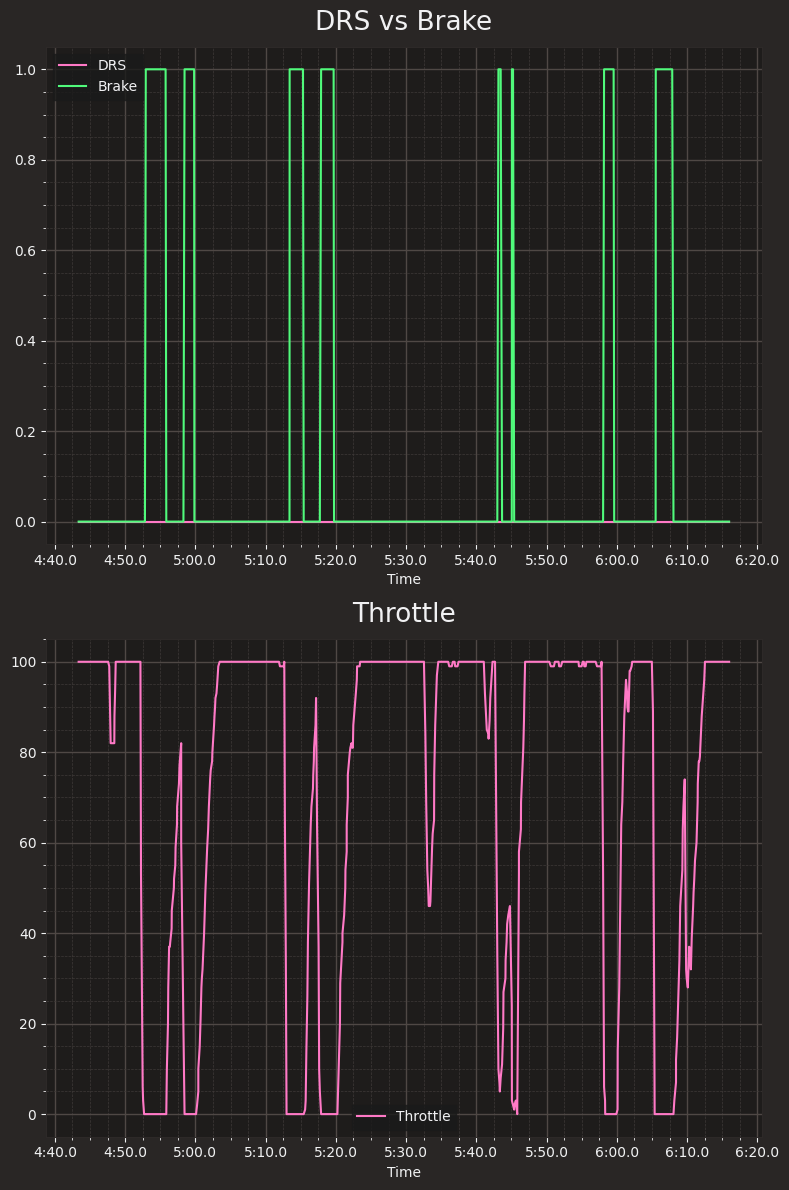

In [88]:
t = df ['Time']

drs = df ['DRS']
br = df ['Brake']
sp = df ['Speed']
tr = df ['Throttle']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 12))
# ===================
ax1.plot(t, drs, label='DRS')
ax1.plot(t, br, label='Brake')
ax1.set_xlabel('Time')
ax1.set_title('DRS vs Brake')
ax1.legend() 
# ===================
ax2.plot(t, tr, label='Throttle')
ax2.set_xlabel('Time')
ax2.set_title('Throttle')
ax2.legend()

plt.tight_layout()  # To avoid overlapping labels and titles

plt.show()

In [55]:
# race.car_data['55']
pos_data = race.laps.pick_driver('LEC').get_pos_data(pad=1, pad_side='both')
car_data = race.laps.pick_driver('LEC').get_car_data(pad=1, pad_side='both')


In [42]:
race.laps.pick_driver('LEC').get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2023-07-09 14:03:09.871,10558,0,1,37,True,1,car,0 days 00:00:00.104000,0 days 01:02:08.835000
1,2023-07-09 14:03:10.031,10491,0,1,37,True,1,car,0 days 00:00:00.264000,0 days 01:02:08.995000
2,2023-07-09 14:03:10.231,9511,2,1,36,False,1,car,0 days 00:00:00.464000,0 days 01:02:09.195000
3,2023-07-09 14:03:10.431,8111,10,1,37,False,1,car,0 days 00:00:00.664000,0 days 01:02:09.395000
4,2023-07-09 14:03:10.751,5871,20,1,37,False,1,car,0 days 00:00:00.984000,0 days 01:02:09.715000
...,...,...,...,...,...,...,...,...,...,...
19233,2023-07-09 15:28:44.607,10852,233,6,100,False,0,car,0 days 01:25:34.840000,0 days 02:27:43.571000
19234,2023-07-09 15:28:44.967,11112,240,6,100,False,0,car,0 days 01:25:35.200000,0 days 02:27:43.931000
19235,2023-07-09 15:28:45.127,11258,245,6,100,False,0,car,0 days 01:25:35.360000,0 days 02:27:44.091000
19236,2023-07-09 15:28:45.287,11380,247,6,99,False,0,car,0 days 01:25:35.520000,0 days 02:27:44.251000


In [58]:
merged_data = car_data.merge_channels(pos_data)

In [59]:
merged_data

,Date,Status,X,Y,Z,Source,Time,SessionTime,RPM,Speed,nGear,Throttle,Brake,DRS
0,2023-07-09 14:03:09.574,OnTrack,-1190,1950,1970,pos,0 days 00:00:00,0 days 01:02:08.538000,10527,0,1,37,True,1
1,2023-07-09 14:03:09.671,OnTrack,-1190,1949,1969,car,0 days 00:00:00.097000,0 days 01:02:08.635000,10527,0,1,37,True,1
2,2023-07-09 14:03:09.814,OnTrack,-1190,1950,1970,pos,0 days 00:00:00.240000,0 days 01:02:08.778000,10542,0,1,37,True,1
3,2023-07-09 14:03:09.871,OnTrack,-1189,1950,1970,car,0 days 00:00:00.297000,0 days 01:02:08.835000,10558,0,1,37,True,1
4,2023-07-09 14:03:09.974,OnTrack,-1190,1950,1970,pos,0 days 00:00:00.400000,0 days 01:02:08.938000,10524,0,1,37,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39030,2023-07-09 15:28:45.373,OnTrack,-1876,1046,1963,pos,0 days 01:25:35.799000,0 days 02:27:44.337000,11464,249,6,99,False,0
39031,2023-07-09 15:28:45.554,OnTrack,-1742,1229,1963,pos,0 days 01:25:35.980000,0 days 02:27:44.518000,11548,252,6,99,False,0
39032,2023-07-09 15:28:45.607,OnTrack,-1710,1271,1963,car,0 days 01:25:36.033000,0 days 02:27:44.571000,11632,255,6,99,False,0
39033,2023-07-09 15:28:45.807,OnTrack,-1646,1355,1963,car,0 days 01:25:36.233000,0 days 02:27:44.771000,11828,259,6,99,False,0


In [22]:
import pandas as pd

bot = race.laps.pick_driver('BOT')
telemetry = bot.get_telemetry()

In [24]:
telemetry['DRS'].unique()

array([ 1,  0,  8, 14, 12, 10])

In [10]:
race.car_data['44'].pos_data

AttributeError: 'Telemetry' object has no attribute 'pos_data'

In [9]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
lap.get_telemetry()


core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']


,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2021-07-03 13:52:43.255,0 days 01:07:16.840000,,429.534722,0 days 00:00:00,10706,293,8,100,False,12,interpolation,0.093493,0.000022,OnTrack,1193,-1182,7214
3,2021-07-03 13:52:43.300,0 days 01:07:16.885000,,429.534722,0 days 00:00:00.045000,10718,294,8,100,False,12,pos,3.783333,0.000878,OnTrack,1159,-1192,7215
4,2021-07-03 13:52:43.520,0 days 01:07:17.105000,,429.534722,0 days 00:00:00.265000,10739,295,8,100,False,12,pos,21.924825,0.005090,OnTrack,985,-1239,7215
5,2021-07-03 13:52:43.540,0 days 01:07:17.125000,77,429.534722,0 days 00:00:00.285000,10761,297,8,100,False,12,car,23.583333,0.005475,OnTrack,969,-1243,7214
6,2021-07-03 13:52:43.740,0 days 01:07:17.325000,77,424.501389,0 days 00:00:00.485000,10815,298,8,100,False,12,pos,40.244841,0.009344,OnTrack,809,-1287,7214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2021-07-03 13:53:46.540,0 days 01:08:20.125000,77,408.156667,0 days 00:01:03.285000,11640,287,7,100,False,12,car,4268.278889,0.990976,OnTrack,1533,-1091,7215
549,2021-07-03 13:53:46.681,0 days 01:08:20.266000,77,404.056667,0 days 00:01:03.426000,11702,288,7,100,False,12,pos,4279.614223,0.993608,OnTrack,1425,-1120,7215
550,2021-07-03 13:53:46.780,0 days 01:08:20.365000,77,399.956667,0 days 00:01:03.525000,11764,290,7,100,False,12,car,4287.612222,0.995465,OnTrack,1357,-1138,7214
551,2021-07-03 13:53:46.901,0 days 01:08:20.486000,77,399.956667,0 days 00:01:03.646000,11770,291,7,100,False,12,pos,4297.434742,0.997745,OnTrack,1277,-1161,7215


GRAPH

In [3]:
import fastf1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np


session = fastf1.get_session(2021, 'Austrian Grand Prix', 'Q')
session.load()

lap = session.laps.pick_fastest()
tel = lap.get_telemetry()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /home/hakbro/.cache/fastf1.
	Size: 335.99 MB
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '4', '11', '44', '77', '10', '22', '5', '63', '18', '55', '16', '3', '14', '99', '7', '31', '6', '47', '9']


In [16]:
x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
points[:-1]
# segments = np.concatenate([points[:-1], points[1:]], axis=1)
# gear = tel['Brake'].to_numpy().astype(float)

array([[[ 1193, -1182]],

       [[ 1159, -1192]],

       [[  985, -1239]],

       ...,

       [[ 1425, -1120]],

       [[ 1357, -1138]],

       [[ 1277, -1161]]])

In [11]:
cmap = cm.get_cmap('Paired')
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

/tmp/ipykernel_10426/1159196919.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Paired')


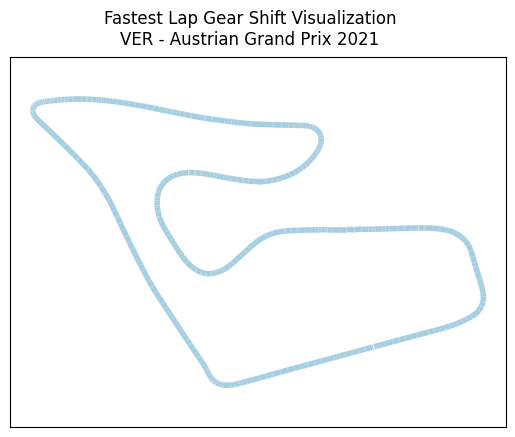

In [12]:
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"{lap['Driver']} - {session.event['EventName']} {session.event.year}"
)

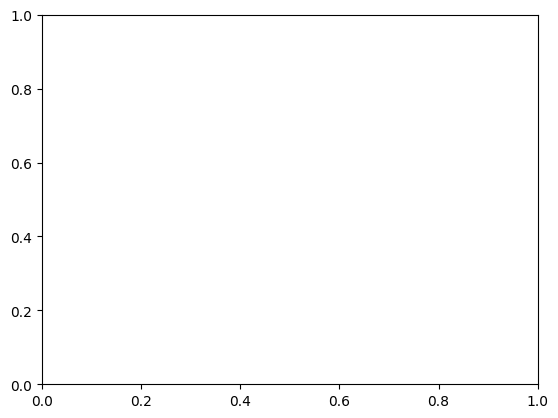

In [13]:
cbar = plt.colorbar(mappable=lc_comp, label="Gear", boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()